In [2]:
using Plots, ComplexPhasePortrait, ApproxFun, SingularIntegralEquations
gr();

# M3M6: Methods of Mathematical Physics

$$
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\dx{\D x}
\def\dt{\D t}
\def\C{{\mathbb C}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\I{{\rm i}}
\def\qqfor{\qquad\hbox{for}\qquad}
$$

Dr. Sheehan Olver
<br>
s.olver@imperial.ac.uk

<br>
Website: https://github.com/dlfivefifty/M3M6LectureNotes

# Lecture 11: Riemann–Hilbert problems


1. Constant coefficient Riemann–Hilbert problems
   - Subtractive Riemann–Hilbert problem $\phi_+(x) - \phi_-(x) = f(x)$
   - Additive Riemann–Hilbert problem $\phi_+(x) + \phi_-(x) = f(x)$
   
   
Let $\Gamma$ be a set of contours, and for now assume $\Gamma \subset {\mathbb R}$. Given functions $f$ and $g$ defined on $\Gamma$, a (scalar) Riemann–Hilbert problem consists of finding a function $\phi(z)$ with left/right limits 
$$\phi_\pm(x) = \lim_{\epsilon \rightarrow 0} \phi(x \pm \I \epsilon),$$
satisfying the following conditions:

1. $\phi(z)$ analytic in $\bar\C \backslash \Gamma$
2. $\phi(\infty) = C$
2. $\phi(z)$ has weaker than pole singularities everywhere
2. $\phi_+(x) - g(x) \phi_-(x) = f(x)$ for $x \in \Gamma$


Numerous applications! See [\[Trogdon & Olver 2015\]](http://bookstore.siam.org/ot146/). Here are some classical applications:

1. Ideal fluid flow
2. Solving integral equations via Weiner–Hopf factorization
2. Spectral analysis of Schrödinger operators

More recently, non-classical applications have arisen from integrable systems:

2. Solutions to Painlevé equations 
3. Random matrix eigenvalue statistics
2. Solving partial differential equations like the Korteweg–de Vries (KdV) equation describing shallow water waves
$$
u_t + 6u u_x + u_{xxx} = 0
$$

![KdV movie](kdv-movie.gif)

## Constant coefficient Riemann–Hilbert problems

Consider the Riemann–Hilbert problem
$$
    \phi+(x) - c \phi_-(x) = f(x)
$$
on the interval. General $c$ will be looked at in the problem sheets, so we only consider $c \pm 1$.


### Subtractive Riemann–Hilbert problems

The simplest example is when $c =  1$, in which case, assuming $f(x)$ satisfies the conditions of Plemelj theorem,  the solution to 

1. $\phi_+(x) -  \phi_-(x) = f(x)$ for $x \in \Gamma$
2. $\phi(\infty) = C$
2. $\phi(z)$ has weaker than pole singularities

is simply

$$
\phi(z) = \CC_\Gamma f(z) + C
$$

In [3]:
x = Fun()
f = exp(x)
C = 2
φ = x -> cauchy(f, x) + C

φ(0.1+0.0im)- φ(0.1-0.0im) -f(0.1)

2.220446049250313e-16 + 0.0im

Analytic functions are continuous, hence if $\Gamma$ is in the domain of analyticity, we have $\phi_+(x) - \phi_-(x) = 0$. This is why the constant $C$ does not impact the jump. This makes subtractive Riemann–Hilbert problems particularly nice as we can solve each component separately: that is 
$$
\CC_{\Gamma_1 \cup \Gamma_2} f(z) = \CC_{\Gamma_1} f(z) + \CC_{\Gamma_2} f(z)
$$
We can also _fix_ up analyticity:

**Example** 
Solve the Riemann–Hilbert problem

1. $\phi(z)$ analytic in $\bar\C \backslash [-1,1]$
2. $\phi(\infty) = -{\I \over 2}$
2. $\phi(z)$ has weaker than pole singularities everywhere
2. $\phi_+(x) -  \phi_-(x) = {\sqrt{1-x^2} \over x +2}$ for $-1 < x < 1$

Consider the first guess
$$
    \psi(z) = - \I {\sqrt{z-1} \sqrt{z+1} \over 2(z + 2)}
$$
This satisfies 2, 3, and 4: it has the right jump on $-1 < x < 1$:
$$
    \psi_+(x) - \psi_-(x) = {\sqrt{1-x^2} \over x+2}
$$

In [4]:
f = sqrt(1-x^2)/(x+2)
ψ = z -> -im*sqrt(z-1)sqrt(z+1)/(2(z+2))
@show ψ(1_000_000.0)  # condition 2.
@show f(0.1)
@show ψ(0.1+0.0im) - ψ(0.1-0.0im); # condition 4.

ψ(1.0e6) = 0.0 - 0.49999900000175im
f(0.1) = 0.47380354147934295
ψ(0.1 + 0.0im) - ψ(0.1 - 0.0im) = 0.47380354147934284 + 0.0im


The catch: it has a pole at $z = - 2$ 😩:

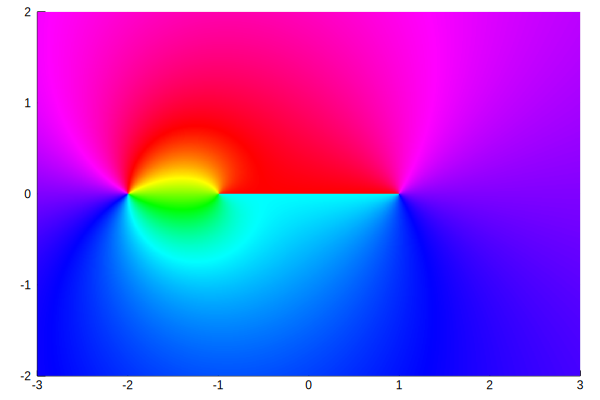

In [5]:
phaseplot(-3..3, -2..2, ψ)

In particular, 
$$
\psi(z) = {\I \sqrt 3 \over 2} {1 \over z + 2} + O(1)
$$
near $z = -2$.  Note that this takes a bit of care to work out since we are on the cancelling out branch cuts of $\psi(z)$. But we do know away from $z = -2$ it is analytic, hence continuous, that is, 
$$
\psi(x) = \lim_{\epsilon \rightarrow 0} \psi(x \pm \I \epsilon) = \psi_\pm(x)
$$
for real valued $x < -1$. In particular,  we have
$$
\psi(x) = \psi_+(x) = - \I { \I \sqrt{1-x} \I \sqrt{-x-1} \over 2( x+2)} = \I {\sqrt{x^2 - 1} \over 2( x+2)}
$$


Good thing it's a subtractive Riemann–Hilbert problem: we can subtract out the pole without impacting the jump. Therefore, we have
$$
\phi(z) = \psi(z)  - {\I \sqrt 3 \over 2} {1 \over z + 2}=- \I {\sqrt{z-1} \sqrt{z+1} \over 2(z + 2)}  - {\I \sqrt 3 \over 2} {1 \over z + 2}
$$
This is analytic off $[-2,2]$ (including at $z = -2$) and has the right jump:

φ(1.0e6) = 0.0 - 0.49999986602542174im
f(0.1) = 0.47380354147934295
φ(0.1 + 0.0im) - φ(0.1 - 0.0im) = 0.47380354147934284 + 0.0im


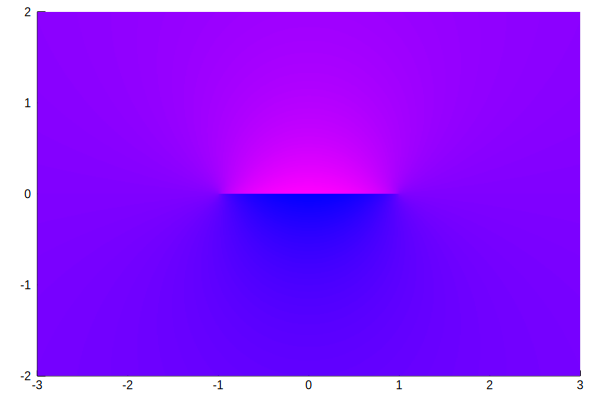

In [6]:
φ = z -> ψ(z) - im*sqrt(3)/(2*(z+2))
@show φ(1_000_000.0)  # condition 2.
@show f(0.1)
@show φ(0.1+0.0im) - φ(0.1-0.0im) # condition 4.
phaseplot(-3..3, -2..2, φ)

### Additive Riemann–Hilbert problem

We now introduce  the case $c = -1$, in other words, we want to solve
$$
\phi_+(x) + \phi_-(x) = f(x) \qquad \phi(\infty) = 0
$$
and take $\Gamma = [-1,1]$. This is equivalent to finding an unknown function $u(x)$ such that
$$
-\I \HH u(x) = f(x)
$$


#### Reduction to Cauchy transform

Consider $\phi(z) = {\psi(z) \over \sqrt{z-1}\sqrt{z+1} }$, so that
$$
    f(x) = \phi_+(x) + \phi_-(x) = { \psi_+(x) \over \I \sqrt{1-x^2}} - {\psi_-(x) \over \I \sqrt{1-x^2}} =  {\psi_+(x) - \psi_-(x) \over \I \sqrt{1-x^2}}
$$
Thus we have reduced an additive Riemann–Hilbert problem to a subtractive one: if
$$\psi_+(x) - \psi_-(x) = {f(x) \I \sqrt{1-x^2}},$$
we satisfy the correct jump. Therefore, we have the solution
$$
\phi(z) = {\I \over \sqrt{z-1}\sqrt{z+1}} \CC_{[-1,1]} \left[{ f \sqrt{1-\diamond^2}}\right](z) 
$$

φ(1.0e8) = -2.825795526749808e-17 + 0.0im
f(0.1) = 1.1051709180756475
φ(0.1 + 0.0im) + φ(0.1 - 0.0im) = 1.1051709180756475 + 0.0im


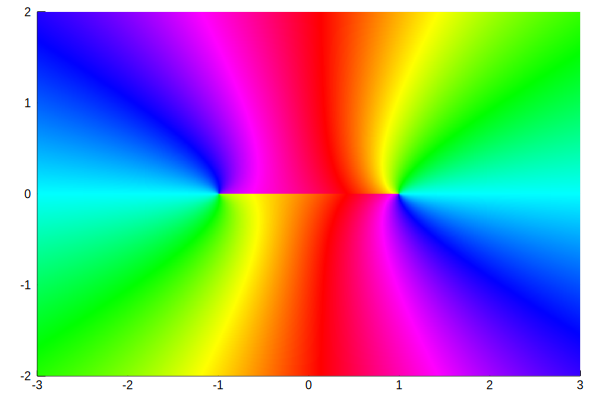

In [7]:
x = Fun()
f = exp(x)

v = f*sqrt(1-x^2)

φ = z -> im*cauchy(v, z)/(sqrt(z-1)sqrt(z+1))

@show φ(1.0E8)
@show f(0.1)
@show φ(0.1+0.0im) + φ(0.1-0.0im);

phaseplot(-3..3, -2..2, φ)

Is this the only solution? No! consider
$$
\kappa(z) = {1 \over \sqrt{z-1}\sqrt{z+1}}
$$
which satisfies $\kappa_+(x) + \kappa_-(x) = 0$. 



### General solution on $[-1,1]$ built _from_ a Cauchy transform

Here we propose the general solution to an additive Riemann–Hilbert problem:

**Theorem (Cauchy transform solution to Additive Riemann–Hilbert problem)** Suppose $\phi(z)$ analytic in $\C \backslash [-1,1]$ satisfies

1. $\phi_+(x) + \phi_-(x) = f(x) $ for $-1 < x < 1$, where $f$ is smooth on $[-1,1]$.
2. $\phi(z)$ has weaker than pole singularities,
3. $\phi(\infty) = 0$.

Then, for some constant $C$, 
$$
 \phi(z) = {\I \over \sqrt{z-1}\sqrt{z+1}} \CC_{[-1,1]} \left[{ f(\diamond)  \sqrt{1-\diamond^2} }\right](z)  + {C \over \sqrt{z-1} \sqrt{z+1}}
$$



φ(1.0e8) = -6.543337674831032e-9 + 0.0im
f(0.1) = 1.1051709180756475
φ(0.1 + 0.0im) + φ(0.1 - 0.0im) = 1.1051709180756475 + 0.0im


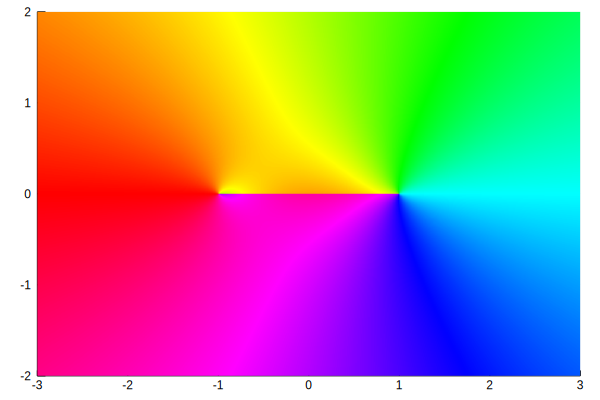

In [10]:
x = Fun()
f = exp(x)
v = f*sqrt(1-x^2)

C = randn() # doesn't matter

φ = z -> im*cauchy(v, z)/(sqrt(z-1)sqrt(1+z)) + C/(sqrt(z-1)sqrt(z+1))

@show φ(1.0E8)
@show f(0.1)
@show φ(0.1+0.0im) + φ(0.1-0.0im);

phaseplot(-3..3, -2..2, φ)

On other intervals $(a,b)$, we get the same forms of solution:

$$
 \phi(z) = {\I \over \sqrt{z-b}\sqrt{z-a}} \CC_{[a,b]} \left[{ f(\diamond)  \sqrt{b-\diamond}\sqrt{\diamond-a} }\right](z)  + {C \over \sqrt{z-b} \sqrt{z-a}}
$$

### General solution on $[-1,1]$ _expressed as_ a Cauchy transform

Note the expression above is _not_ a Cauchy transform of a function. We can determine a Cauchy transform expression by taking the difference: on $[-1,1]$ we have

\begin{align*}
    u(x) &= \phi_+(x) - \phi_-(x) = {1 \over \sqrt{1 - x^2}}\left(        \CC_{[-1,1]}^+ + \CC_{[-1,1]}^- \right) \left[{ f(\diamond)  \sqrt{1-\diamond^2} }\right](x) - {2C \I \over \sqrt{1-x^2}} \\
    &= {-\I \over \sqrt{1 - x^2}}\HH_{[-1,1]} \left[{ f(\diamond)  \sqrt{1-\diamond^2} }\right](x) - {2C \I \over \sqrt{1-x^2}}
\end{align*}
BY (**Plemelj II**), we guarantee that 
$$
\phi(z) = \CC_{[-1,1]} u(z)
$$

In [17]:
x = Fun()
f = exp(x)
v = f*sqrt(1-x^2)

C = randn() # doesn't matter

φ = z -> im*cauchy(v, z)/(sqrt(z-1)sqrt(1+z)) + C/(sqrt(z-1)sqrt(z+1))

u = -im/sqrt(1-x^2)*hilbert(f*sqrt(1-x^2)) - 2*C*im/sqrt(1-x^2)

@show φ(1.0+2.0im);
@show cauchy(u, 1.0+2.0im);

φ(1.0 + 2.0im) = 0.1674484261991792 - 0.2713677090129005im
cauchy(u, 1.0 + 2.0im) = 0.16744842619917932 - 0.27136770901290047im


On other intervals we have
\begin{align*}
    u(x) &= {-\I \over \sqrt{b - x}\sqrt{x-a}}\HH_{[a,b]} \left[{ f(\diamond)  \sqrt{b-\diamond}\sqrt{\diamond-a} }\right](x) - {2C \I \over \sqrt{b-x} \sqrt{x-a}}
\end{align*}


In the special case where we can calculate 
$\CC \left[ f(\diamond) \sqrt{b-\diamond}\sqrt{\diamond-a}\right](z)$ exactly, we can work out the precise formula for $u(x)$ by taking the difference.


**Example** Consider solving

1. $\phi_+(x) + \phi_-(x) = x $ for $-b < x < b$
2. $\phi(z)$ has weaker than pole singularities,
3. $\phi(\infty) = 0$.

Note that 
$$
    \kappa(z) = {z \sqrt{z-b} \sqrt{z+b} - z^2 + b^2/2 \over 2 \I} 
$$
satisfies
$$
\kappa^+(x) - \kappa^-(x) = x \sqrt{b^2 - x^2}
$$
and $\kappa(\infty) = 0$. The second property follows since $\kappa$ is analytic off $[-1,1]$ and has at most polynomial growth at $\infty$.  To understand the order of the polynomial growth, it's sufficient to study the limit on the real axis as $x \rightarrow \infty$, where we use the Taylor series of $\sqrt x$ near $1$ to determine:
\begin{align*}
x \sqrt{x-b}\sqrt{x + b} &= x^2 \sqrt{1-b/x} \sqrt{1 + b/x} = x^2 \left(1 - {b\over 2x} - {b^2 \over 8x^2}\right) \left(1 + {b\over 2x} - {b^2 \over 8x^2}\right)\\
   = x^2 - {b^2\over 2}  + O(x^{-2})
\end{align*}

In [18]:
b = 2
κ = z -> (z*sqrt(z-b)*sqrt(z+b) - z^2 + b^2/2)/(2im)
@show κ(1E5)
κ(0.1+0.0im)- κ(0.1-0.0im),   0.1sqrt(b^2-0.1^2)

κ(100000.0) = 0.0 - 0.0im


(0.1997498435543818 + 0.0im, 0.1997498435543818)

Hence every solution has the form
\begin{align*}
\phi(z) = {1 \over \sqrt{z-b} \sqrt{z+b}} \left({z \sqrt{z-b} \sqrt{z+b} - z^2 + b^2/2 \over 2 }  \right) + {C \over \sqrt{z-b} \sqrt{z+b}} \\
=  {z  \over 2 } - {z^2 \over 2  \sqrt{z-b} \sqrt{z+b}} + {D \over \sqrt{z-b} \sqrt{z+b}}
\end{align*}
where $D$ is again a arbitrary constant.

In [27]:
D = randn()

φ = z -> z/(2) - z^2/(2*sqrt(z-b)*sqrt(z+b)) + D/(sqrt(z-b)*sqrt(z+b))
φ(0.1+0.0im) + φ(0.1-0.0im)

0.1 + 0.0im

Inspection reveals that
$$
u(x) = \phi_+(x) - \phi_-(x) = \I {x^2 - 2D \over  \sqrt{b^2-x^2}}
$$

In [65]:
x = Fun(-b..b)
u = im*(x^2 - 2D)/sqrt(b^2 - x^2)
@show cauchy(u ,2+2im)
@show φ(2+2im);

cauchy(u, 2 + 2im) = -0.38895324392466324 + 0.8558850675485229im
φ(2 + 2im) = -0.3889532439246629 + 0.8558850675485228im


Therefore, $\CC u(z)$ satsifies $\CC^+u(x) + \CC^- u(x) = x$:

In [22]:
cauchy(u, 0.1+0.0im) + cauchy(u, 0.1-0.0im)

0.041082298011221145 + 0.0im

$D$ is a free paremeter, hence, similar to ODEs, we can add a boundary condition. In other words we can ask for the solution satisfying, for example $u(0) = 0$. This is precisely when $D = 0$ and $u(x) = \I x^2 / \sqrt{b^2-x^2}$.

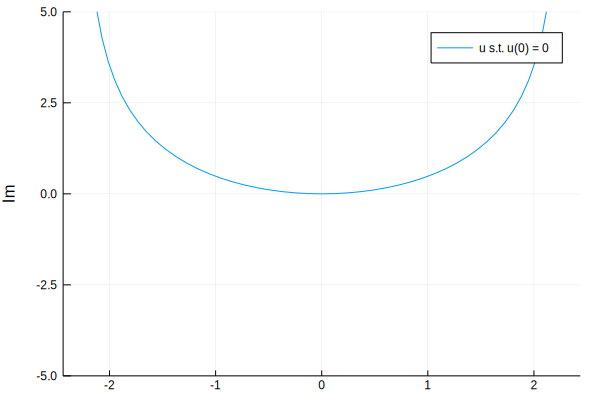

In [66]:
D = 0
u = im*(x^2 - 2D)/sqrt(b^2 - x^2)
plot(imag(u); ylims=(-5,5), yaxis="Im", label="u s.t. u(0) = 0")

Often we ask for the solution that is bounded at the left/right endpoint. Because of the symmetry in the problem (since $x$ is an odd function), we can actually get a solution that is bounded at both $\pm b$ by choosing $D =  b^2/2$:
$$
\phi_+(x) - \phi_-(x) = -\I \sqrt{b^2 - x^2}
$$

cauchy(u, 0.1 + 0.0im) + cauchy(u, 0.1 - 0.0im) = 0.10000000000000007 + 0.0im


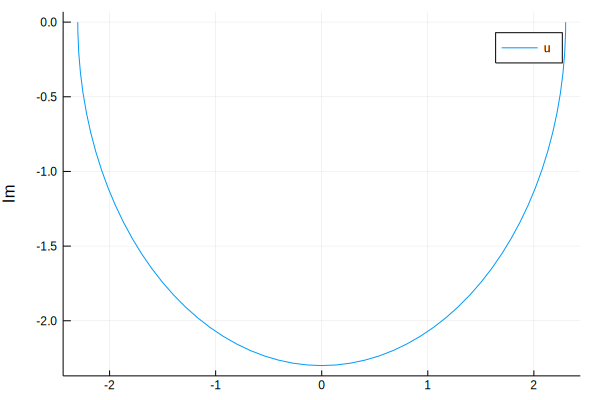

In [67]:
b = 2.3
x = Fun(-b .. b)
u = -im*sqrt(b^2 - x^2)
@show cauchy(u, 0.1+0.0im) + cauchy(u, 0.1-0.0im)
plot(imag(u); label="u", yaxis="Im")

In other words,
$$
\phi(z) = - \I \CC_{[-b,b]} \sqrt{b^2 - \diamond^2}(z)
$$
is a bounded solution to the additive Riemann–Hilbert problem.

## Inverting the Hilbert transform

We can use this along with Plemelj's lemma to invert the Hilbert transform. That is, we want to find $v(x)$ such that
$$
\HH v(x) = f(x)
$$
Based on the above construction of $u(x)$, consider
$$
    v(x) =-\I u(x) =  {-1 \over \sqrt{1 - x^2}}\HH_{[-1,1]} \left[{ f(\diamond)  \sqrt{1-\diamond^2} }\right](x) - {2C \over \sqrt{1-x^2}}
$$  

In [68]:
x= Fun()
f = exp(x)

C = randn()
v = -1/sqrt(1-x^2)*hilbert(f*sqrt(1-x^2)) - 2*C/sqrt(1-x^2)
hilbert(v, 0.1) - exp(0.1)

-2.220446049250313e-16

This construction works since $\phi(z) = \CC u(z) = \I \CC v(z)$, and
$$
\HH v(x) = \I (\CC^+ + \CC^-) v(x) = \phi^+(x) + \phi^-(x) = f(x)
$$

**Example** 

Consider $\HH_{[-b,b]}  v(x) = x$. We have 
$$
 -\I \HH_{[-b,b]} \sqrt{b^2 - \diamond^2}(x) = \CC_{[-b,b]}^+ \sqrt{b^2 - \diamond^2}(z) + \CC_{[-b,b]}^- \sqrt{b^2 - \diamond^2}(z) = \I (\phi^+(x) + \phi^-(x) ) = \I x
$$
which shows that the solution is
$$
v(x)  = - \sqrt{b^2 - \diamond^2}
$$

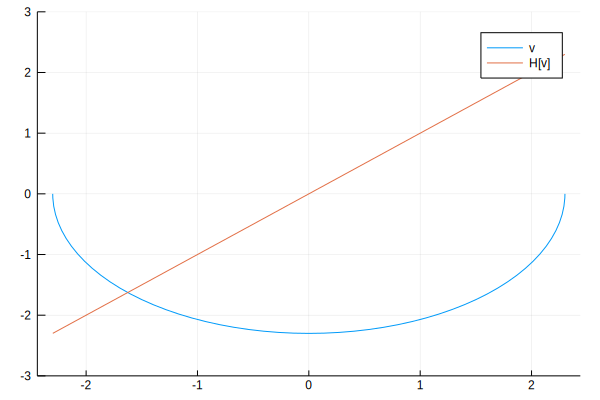

In [69]:
x = Fun(-b .. b)
v = -sqrt(b^2 - x^2)

plot(v; label = "v")
plot!(hilbert(v); ylims=(-3,3), label="H[v]")